# Finite Element Method to solve Cyclic Votammetry

In [1]:
# import librairies
from fenics import *
import numpy as np

In [2]:
# Define Equations constants
# Set constants
pi = np.pi
delta = 0.5                       # Electron transfer coefficient
D_A = 1                           # Ratio of diffusion coefficient of A
D_plus = 1                        # Ratio of diffusion coefficient of B
K0 = 20                           # Dimensionles electron transfer rate constant
p1 = -10                          # Starting dimensionless potential
p2 = 10                           # End dimensionless potential
D_depth = 5*(2*pi*(p2+8))**0.5
t_lambda = p2-p1
ht = 0.1                          # Dimesionless time interval
C_A0 = 1                          # tf.constant(1, dtype=DTYPE)
C_B0 = 0                          # tf.constant(0, dtype=DTYPE)

In [3]:
def dimensionless_potential(t):
    if t <= t_lambda:
        return p1 + t, 
    return p2 - (t - t_lambda)

def electron_transfer_rate_constants(P):
    Kf = K0 * np.exp((1 - delta) * P)
    Kb = K0 * np.exp((-delta) * P)
    return Kf, Kb

In [4]:
tol = 1E-14
def boundary_L(x, on_boundary):
    return on_boundary and (near(x, 0, tol))

def boundary_R(x, on_boundary):
    return on_boundary and (near(x, D_depth, tol))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem

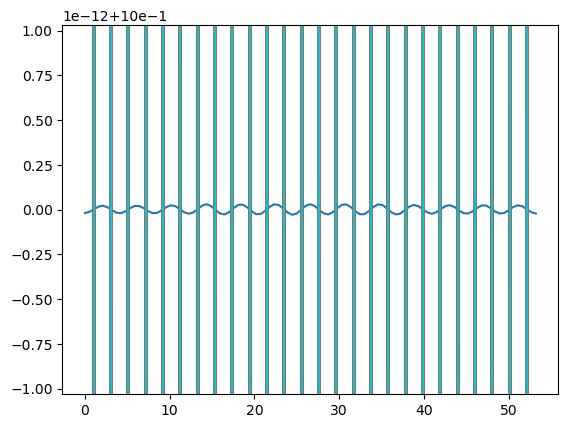

In [7]:
T = 2*t_lambda  # final time
num_steps = 100  # number of time steps
dt = T / num_steps  # time step size


# Create mesh and define function space
mesh = IntervalMesh(100, 0, D_depth)
V = FunctionSpace(mesh, 'P', 1)

# Define initial value
u_0 = Expression("1.0", degree=0)
u_n = interpolate(u_0, V)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

F = u*v*dx - dt*dot(grad(u), grad(v))*dx - u_n*v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u)

    # Plot solution
    plot(u)

    # Update previous solution
    u_n.assign(u)

# Hold plot
import matplotlib.pyplot as plt
plt.show()


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

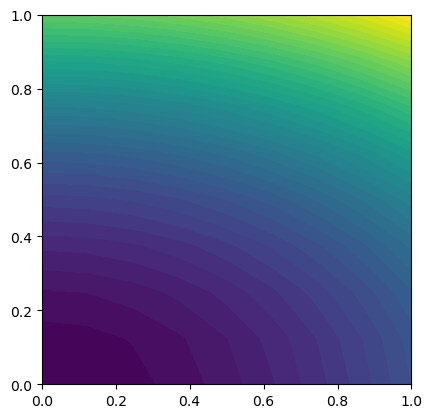

In [18]:
from fenics import *
import numpy as np
T = 2.0
# final time
num_steps = 100
# number of time steps
dt = T / num_steps # time step size
alpha = 3
# parameter alpha
beta = 1.2
# parameter beta
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=0)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)
# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):
    # Update current time
    t += dt
    u_D.t = t
    # Compute solution
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    # u_e = interpolate(u_D, V)
    # error = np.abs(u_e.vector().get_array() - u.vector().get_array()).max()
    # print('t = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_n.assign(u)
# Hold plot
# interactive()
plt.show()